# Lab 08 (Module 09)
Hao-Tien Kuo

## Time Series

In [1]:
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Alcohol_Sales.csv')

In [2]:
df.head()

,DATE,units_sold
0,January-92,3459
1,February-92,3458
2,March-92,4002
3,April-92,4564
4,May-92,4221


In [3]:
# The date information is in a non-standard format. You will need to convert it to a datetime.

df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce', format='%B-%y')
df.head()

,DATE,units_sold
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [4]:
# Make the date value an index using set_index()

df.set_index('DATE', inplace=True)
df.head()

,units_sold
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


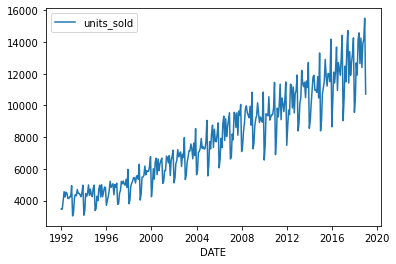

In [5]:
# Plot the number of units sold vs time.

sns.lineplot(data=df)
plt.show()

a. Are data independent? 

No, there seems to be corelations between observations that are close to each other.

b. Is the data stationery? 

No, it increases over time, which indicates a time trend.

In [16]:
# Make the data stationery using differencing. 

df_shift = df - df.shift()
df_shift.dropna(inplace=True)

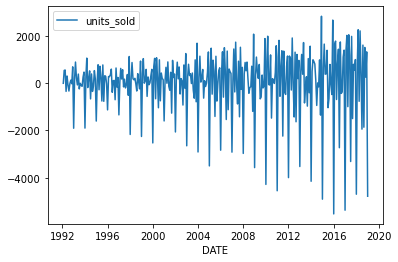

In [17]:
sns.lineplot(data=df_shift)
plt.show()

In [18]:
# Use this function to test whether the series is stationary.

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

def get_stationarity(timeseries, varname):
    """Title: get_stationerity
    Function for testing whether time series data is stationery.
    
    Args:
        timeseries - Dateframe containing time series
        varname - Name of the column containing the series values
    """
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean() 
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries[varname])
    print('ADF Statistic: {}'.format(result[0])) 
    print('p-value: {}'.format(result[1])) 
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

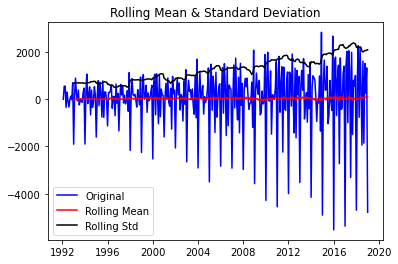

ADF Statistic: -4.365959619246036
p-value: 0.0003408284921170264
Critical Values:
	1%: -3.451621854687657
	5%: -2.870908950689806
	10%: -2.571761810613944


In [19]:
get_stationarity(df_shift, 'units_sold') 

a. Did differencing make the data stationery? 

Yes, the rolling mean seems to be consistent. 

b. Do you see another issue with the data? Hint: Think about the other regression assumptions, apart from independence.

The variance does not stay constant, but increases over time.

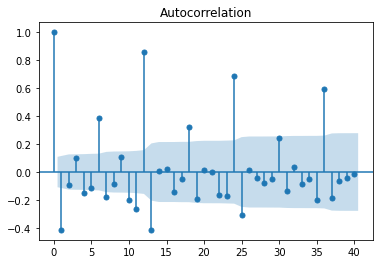

In [27]:
# Generate ACF and PACF plots of the differenced data. 

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_shift, lags = 40)
plt.show()

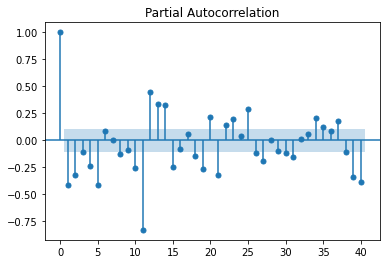

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_shift, lags = 40)
plt.show()

a. Would a time series model be appropriate?

Yes, we should account for the time trend observed in the data.

b. Will this require an ARIMA or a SARIMA model? 

SARIMA would be more suitable here, since we observe a clear seasonality in the plots above.